# Classwork 7: GLMs - Logistic/Binomial Regression

The goal of this assignment is to analyze data using generalized linear models.

## Problem #1

In January 1986, the space shuttle Challenger exploded shortly after launch. An investigation was launched into the cause of the crash and attention focused on the rubber O-ring seals in the rocket boosters. At lower temperatures, rubber becomes more brittle and is a less effective sealant. At the time of the launch, the temperature was 31°F. Could the failure of the O-rings have been predicted? In the 23 previous shuttle missions for which data exists, some evidence of damage due to blow by and erosion was recorded on some O-rings. Each shuttle had two boosters, each with three O-rings. For each mission, we know the number of O-rings out of six showing some damage and the launch temperature. 

The 'orings' is a data frame with 23 observations on the following 2 variables.

1. temp:  Ambient temperature (Fahrenheit) at launch time
2. damage: Number of damaged 'O' rings (out of a total of 6)

#### (a) Construct a new variable called prop, which is the proportion of damaged 'O' rings. Plot prop against temperature. What do you notice about this plot?

,temp,damage
,<int>,<int>
1,53,5
2,57,1
3,58,1
4,63,1
5,66,0
6,67,0


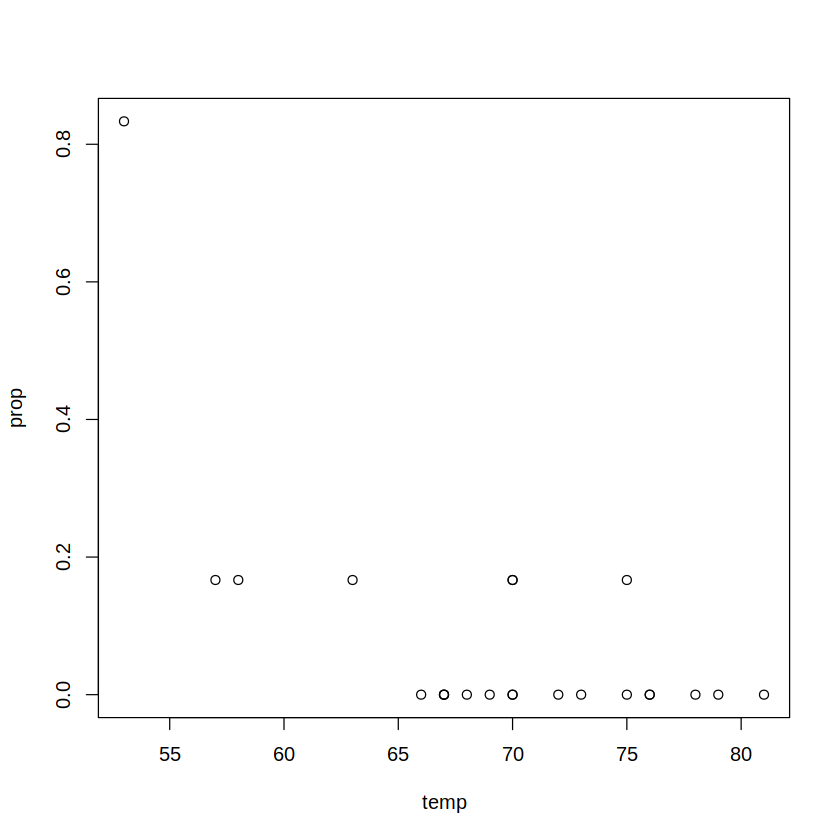

In [4]:
# 1) CODE HERE
orings = read.csv("orings.csv")
head(orings)

orings$prop = orings$damage/6

with(orings, plot(temp,prop))

**(b) Use the `glm()` function for fitting the logit model (logistic regression).**

Note: The first argument will be the model: `response ~ predictors`. For binomial response data, we need two pieces of information about the response values: `y` and `n`. Thus for binomial families, the response can be specified as a two-column matrix with the columns giving the numbers of successes and failures. You'll also need to specify the `family` argument, and the `data` argument. Use ?glm to specify these arguments.

First, just note that a standard linear model isn't a great idea...

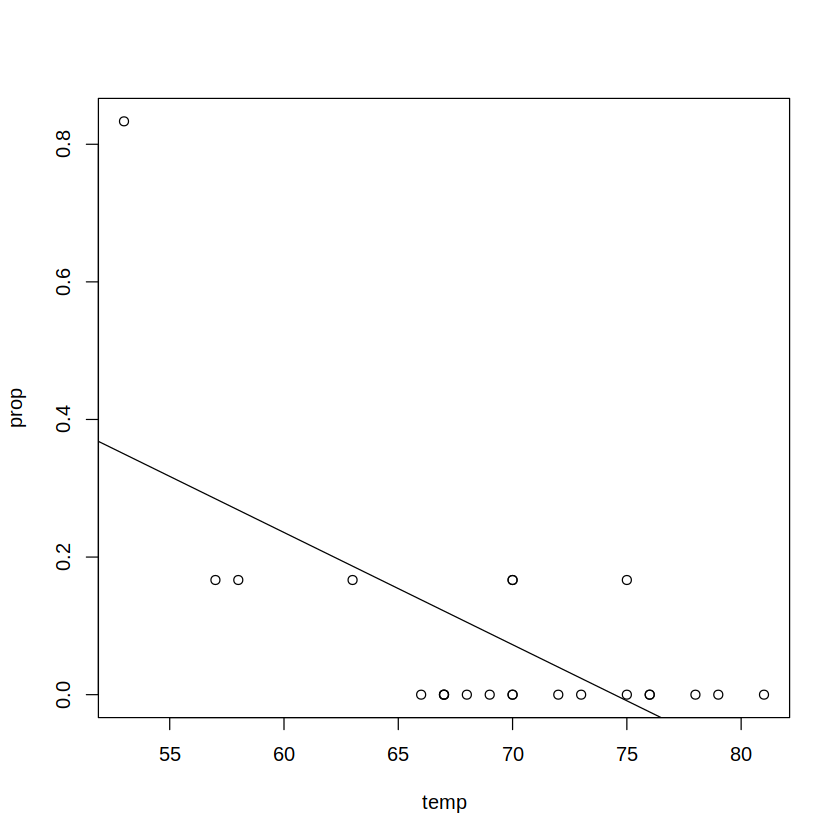

In [5]:
#first, just note that a standard linear model isn't a great idea...
lmod = lm(prop~temp,data=orings)
with(orings, plot(temp,prop))
abline(lmod)

In [7]:
# 2) CODE HERE
# Wilkinsons-Rogers format for response
glmod = glm(cbind(orings$damage,6 - orings$damage)~temp,data=orings,family=binomial)
summary(glmod)


Call:
glm(formula = cbind(orings$damage, 6 - orings$damage) ~ temp, 
    family = binomial, data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
temp        -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


**(c) Plot the data again with the logit model.**

You'll need the inverse of the logit function: $$\text{ilogit}(\eta) = \frac{e^\eta}{1 + e^\eta}.$$

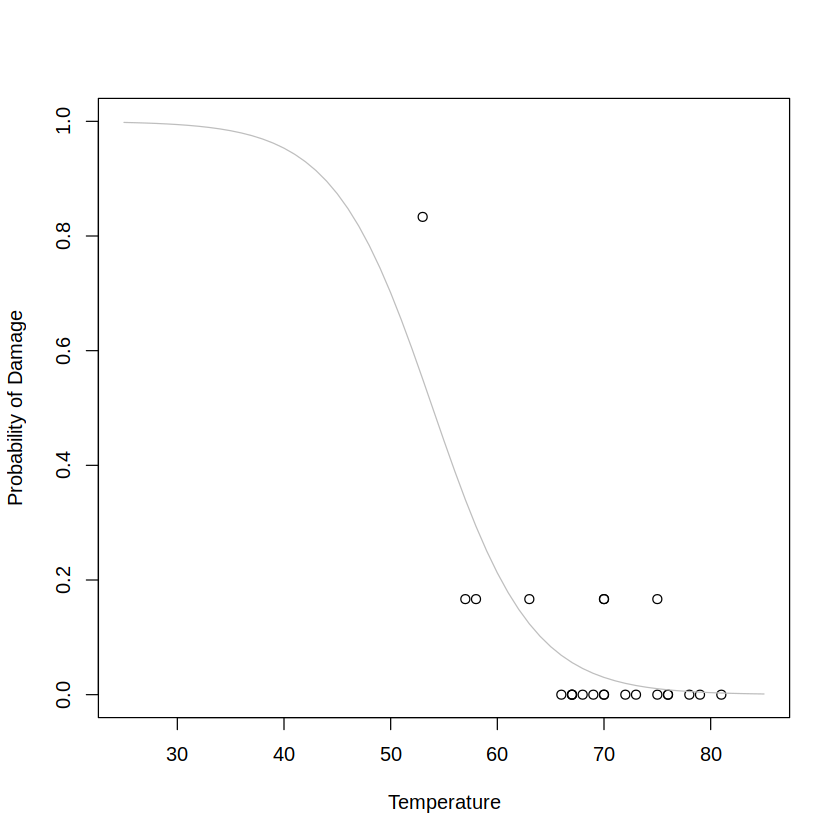

In [8]:
# 3) CODE HERE
plot(orings$temp, orings$prop, xlim = c(25,85),ylim =c(0,1), xlab="Temperature",ylab="Probability of Damage")

beta0_hat = 11.66299
beta1_hat = -0.21623
x = seq(25,85,1)
eta = beta0_hat + beta1_hat*x
ilogit = exp(eta)/(1+exp(eta))

lines(x,ilogit,col="grey")

**(d) Now let's check the interpretation of $\widehat{\beta}_1$. Create a new temperature value of 45 and 46 degrees. Calculuate the odds of failure at 45 and 46 degrees. What is the ratio of these two odds?**

Note that in general, the odds ratio is equal to:

$$ \frac{o_{x+1}}{o_x} = \frac{e^{\beta_0 + \beta_1 (x+1)}}{e^{\beta + \beta_1*x}} = e^{\beta_1}$$

In [10]:
# 4) CODE HERE
newtemp1 = data.frame(temp=45)
logodds1 = coef(glmod)[1] + coef(glmod)[2] * newtemp1
odds1  = exp(logodds1)

newtemp2 = data.frame(temp=46)
logodds2 = coef(glmod)[1] + coef(glmod)[2] * newtemp2
odds2  = exp(logodds2)


odds2/odds1

exp(coef(glmod)[2])

temp
<dbl>
0.8055471


temp 
0.8055471

#### (e) Compute confidence intervals for the model parameters "by hand".

In [13]:
# 5) CODE HERE


lower_intercept = coef(glmod)[1] - qnorm(0.975)*3.29626
upper_intercept = coef(glmod)[1] + qnorm(0.975)*3.29626

lower_intercept
upper_intercept


lower_beta1 = coef(glmod)[2] - qnorm(0.975)*0.05318
upper_beta1 = coef(glmod)[2] + qnorm(0.975)*0.05318

lower_beta1
upper_beta1

(Intercept) 
   5.202439

(Intercept) 
   18.12354

temp 
-0.3204645

temp 
-0.1120028

**(f) Now compute them using confint(glmod).**

Notice that these intervals are slightly different; they are based on the profile likelihood and do not assume asymptotic normality. They are more accurate for small sample sizes. Profile likelihood confidence intervals don’t assume normality of the estimator and appear to perform better for small samples sizes than Wald CIs (above). They are, nonetheless, still based on an asymptotic approximation – the asymptotic chi-square distribution of the log likelihood ratio test statistic. (for more info: http://www.math.umt.edu/patterson/ProfileLikelihoodCI.pdf)

In [12]:
# 6) CODE HERE
confint(glmod)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),5.575195,18.737598
temp,-0.332657,-0.120179


**(g) Predict the probability of faulire at Temp = 45 degrees.**


In [16]:
# 7) CODE HERE

prediction = predict.glm(glmod,newtemp1,type="response",se=T)
prediction

challengertemp = data.frame(temp=31)

prediction_31 = predict.glm(glmod,challengertemp,type="response",se=T)
prediction_31

$fit
        1 
0.8735231 

$se.fit
        1 
0.1053889 

$residual.scale
[1] 1

$fit
        1 
0.9930342 

$se.fit
         1 
0.01153332 

$residual.scale
[1] 1

## Problem #2 

A researcher is interested in how variables, such as gre (Graduate Record Exam scores), gpa (grade point average) and prestige of the undergraduate institution (rank), effect admission into graduate school. The response variable, admit/don't admit, is a binary variable.



In [1]:
admission = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(admission)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


**(a) Perform logistic regression treating `admit` as the response. Be sure to treat `rank` as a categorical variable.**

In [2]:
# 8) CODE HERE
admission$rank = as.factor(admission$rank)

admission.glm = glm(admit~gre+gpa+rank,data=admission,family=binomial)

summary(admission.glm)
head(model.matrix(admission.glm))


Call:
glm(formula = admit ~ gre + gpa + rank, family = binomial, data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


,(Intercept),gre,gpa,rank2,rank3,rank4
1,1,380,3.61,0,1,0
2,1,660,3.67,0,1,0
3,1,800,4.00,0,0,0
4,1,640,3.19,0,0,1
5,1,520,2.93,0,0,1
6,1,760,3.00,1,0,0


**(b) Construct a reduced model without the `rank` variable. Conduct the likelihood ratio test to decide whether the reduced model is sufficient. You can do this using `anova()` or `lrtest()`.**

In [4]:
# 9) CODE HERE
admission.red.glm = glm(admit~gre+gpa,data=admission,family=binomial)
summary(admission.red.glm)


Call:
glm(formula = admit ~ gre + gpa, family = binomial, data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2730  -0.8988  -0.7206   1.3013   2.0620  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.949378   1.075093  -4.604 4.15e-06 ***
gre          0.002691   0.001057   2.544   0.0109 *  
gpa          0.754687   0.319586   2.361   0.0182 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 480.34  on 397  degrees of freedom
AIC: 486.34

Number of Fisher Scoring iterations: 4


In [5]:
# goodness of fit/chi-squared test
# H0: Reduced model is sufficient
# H1: Reduced model is not sufficient

anova(admission.red.glm,admission.glm,test ="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,397,480.3440,NA,NA,NA
2,394,458.5175,3,21.82649,7.088456e-05


+ The p-value is too small thereby we can reject the null hypothesis and conclude that reduced model is not sufficient.